In [1]:
import pandas as pd
import time
import itertools
import re

## Step 1 Loading the complete dataset from open food facts

In [2]:
start_time = time.time()
df = pd.read_csv('C:/Users/rampa/Downloads/en.openfoodfacts.org.products.csv/en.openfoodfacts.org.products.csv',on_bad_lines='skip',sep="\t")
end_time = time.time()
print("Time taken to read the csv file: ", end_time - start_time)

C:\Users\rampa\AppData\Local\Temp\ipykernel_37100\1513714696.py:2: DtypeWarning: Columns (0,11,17,31,32,33,34,35,52,56,67,72) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('C:/Users/rampa/Downloads/en.openfoodfacts.org.products.csv/en.openfoodfacts.org.products.csv',on_bad_lines='skip',sep="\t")


Time taken to read the csv file:  311.77258920669556


In [7]:
df[df.image_nutrition_url == 'https://images.openfoodfacts.org/images/products/005/582/302/3255/nutrition_fr.5.400.jpg']

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,last_modified_by,last_updated_t,last_updated_datetime,...,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g,sulphate_100g,nitrate_100g,acidity_100g
268523,55823023255,http://world-en.openfoodfacts.org/product/0055823023255/pickeld-peperoncini,kiliweb,1645656762,2022-02-23T22:52:42Z,1645657494,2022-02-23T23:04:54Z,roboto-app,1.734736e+09,2024-12-20T23:11:08Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
column_100g = [col for col in df.columns.tolist() if col.endswith('100g')]

In [7]:
len(column_100g)

119

In [9]:
column_100g = [item.replace("_100g",'') for item in column_100g]
column_100g

['energy-kj',
 'energy-kcal',
 'energy',
 'energy-from-fat',
 'fat',
 'saturated-fat',
 'butyric-acid',
 'caproic-acid',
 'caprylic-acid',
 'capric-acid',
 'lauric-acid',
 'myristic-acid',
 'palmitic-acid',
 'stearic-acid',
 'arachidic-acid',
 'behenic-acid',
 'lignoceric-acid',
 'cerotic-acid',
 'montanic-acid',
 'melissic-acid',
 'unsaturated-fat',
 'monounsaturated-fat',
 'omega-9-fat',
 'polyunsaturated-fat',
 'omega-3-fat',
 'omega-6-fat',
 'alpha-linolenic-acid',
 'eicosapentaenoic-acid',
 'docosahexaenoic-acid',
 'linoleic-acid',
 'arachidonic-acid',
 'gamma-linolenic-acid',
 'dihomo-gamma-linolenic-acid',
 'oleic-acid',
 'elaidic-acid',
 'gondoic-acid',
 'mead-acid',
 'erucic-acid',
 'nervonic-acid',
 'trans-fat',
 'cholesterol',
 'carbohydrates',
 'sugars',
 'added-sugars',
 'sucrose',
 'glucose',
 'fructose',
 'lactose',
 'maltose',
 'maltodextrins',
 'starch',
 'polyols',
 'erythritol',
 'fiber',
 'soluble-fiber',
 'insoluble-fiber',
 'proteins',
 'casein',
 'serum-proteins'

In [10]:
with open('final_code/config/nutrients.txt', 'w') as nutrients_file:
    nutrients_file.write('\n'.join(column_100g))

In [5]:
df.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,last_modified_by,last_updated_t,last_updated_datetime,...,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g,sulphate_100g,nitrate_100g,acidity_100g
0,54,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1582569031,2020-02-24T18:30:31Z,1733085204,2024-12-01T20:33:24Z,NaN,1.736277e+09,2025-01-07T19:07:50Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,63,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1673620307,2023-01-13T14:31:47Z,1732913331,2024-11-29T20:48:51Z,insectproductadd,1.736257e+09,2025-01-07T13:29:48Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,114,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1580066482,2020-01-26T19:21:22Z,1737247862,2025-01-19T00:51:02Z,smoothie-app,1.737248e+09,2025-01-19T00:51:02Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,http://world-en.openfoodfacts.org/product/0000...,inf,1634745456,2021-10-20T15:57:36Z,1738028711,2025-01-28T01:45:11Z,chancewash,1.738029e+09,2025-01-28T01:45:11Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,105,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1572117743,2019-10-26T19:22:23Z,1738073570,2025-01-28T14:12:50Z,NaN,1.738074e+09,2025-01-28T14:12:50Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
df.image_ingredients_url.sample(30)

1351022                                                  NaN
961713                                                   NaN
2289036    https://images.openfoodfacts.org/images/produc...
809674                                                   NaN
657788                                                   NaN
601710                                                   NaN
2181055    https://images.openfoodfacts.org/images/produc...
2507340                                                  NaN
2454046    https://images.openfoodfacts.org/images/produc...
1742559                                                  NaN
3306205                                                  NaN
3067668                                                  NaN
1353255    https://images.openfoodfacts.org/images/produc...
133565     https://images.openfoodfacts.org/images/produc...
363697     https://images.openfoodfacts.org/images/produc...
3411214    https://images.openfoodfacts.org/images/produc...
3578488                 

In [66]:
df.image_ingredients_url.isna().sum()

2641799

In [1]:
df.columns

NameError: name 'df' is not defined

In [69]:
df[["nutriscore_score","nova_group"]].head()

,nutriscore_score,nova_group
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,1.0,1.0
4,NaN,4.0


# step 2 : eleminating columns with majority null values

In [6]:
null_count_df = df.isnull().sum().reset_index()
null_count_df.columns = ["column", "null_count"]

In [7]:
required_columns = null_count_df[null_count_df.null_count < 3619976]['column'].tolist()

In [19]:
#required columns have at least 10 percent of data not null hence better to consider this for any processing
required_columns

['code',
 'url',
 'creator',
 'created_t',
 'created_datetime',
 'last_modified_t',
 'last_modified_datetime',
 'last_modified_by',
 'last_updated_t',
 'last_updated_datetime',
 'product_name',
 'abbreviated_product_name',
 'generic_name',
 'quantity',
 'packaging',
 'packaging_tags',
 'packaging_en',
 'packaging_text',
 'brands',
 'brands_tags',
 'categories',
 'categories_tags',
 'categories_en',
 'origins',
 'origins_tags',
 'origins_en',
 'manufacturing_places',
 'manufacturing_places_tags',
 'labels',
 'labels_tags',
 'labels_en',
 'emb_codes',
 'emb_codes_tags',
 'first_packaging_code_geo',
 'cities_tags',
 'purchase_places',
 'stores',
 'countries',
 'countries_tags',
 'countries_en',
 'ingredients_text',
 'ingredients_tags',
 'ingredients_analysis_tags',
 'allergens',
 'traces',
 'traces_tags',
 'traces_en',
 'serving_size',
 'serving_quantity',
 'no_nutrition_data',
 'additives_n',
 'additives_tags',
 'additives_en',
 'nutriscore_score',
 'nutriscore_grade',
 'nova_group',
 'p

# step 3: grouping columns logically for better understanding

In [8]:
# Basic Information
basic_info = [
    'code', 'url', 'creator', 'created_t', 'created_datetime', 
    'last_modified_t', 'last_modified_datetime', 'last_modified_by',
    'last_updated_t', 'last_updated_datetime'
]

# Product Details
product_details = [
    'product_name', 'abbreviated_product_name', 'generic_name', 'quantity', 
    'packaging', 'packaging_tags', 'packaging_en', 'packaging_text'
]

# Brand & Category
brand_category = [
    'brands', 'brands_tags', 'categories', 'categories_tags', 
    'categories_en', 'origins', 'origins_tags', 'origins_en',
    'manufacturing_places', 'manufacturing_places_tags'
]

# Labels & Certifications
labels_certifications = [
    'labels', 'labels_tags', 'labels_en', 'emb_codes', 'emb_codes_tags', 
    'first_packaging_code_geo'
]

# Market & Purchase Information
market_purchase_info = [
    'cities_tags', 'purchase_places', 'stores', 'countries', 
    'countries_tags', 'countries_en'
]

# Ingredients & Allergens
ingredients_allergens = [
    'ingredients_text', 'ingredients_tags', 'ingredients_analysis_tags', 
    'allergens', 'traces', 'traces_tags', 'traces_en'
]

# Serving & Nutritional Information
serving_nutrition_info = [
    'serving_size', 'serving_quantity', 'no_nutrition_data', 'additives_n', 
    'additives_tags', 'additives_en'
]

# Health & Nutrition Scores
health_nutrition_scores = [
    'nutriscore_score', 'nutriscore_grade', 'nova_group', 
    'pnns_groups_1', 'pnns_groups_2'
]

# Food Group Classification
food_group_classification = [
    'food_groups', 'food_groups_tags', 'food_groups_en'
]

# Product Status & Quality
product_status_quality = [
    'states', 'states_tags', 'states_en', 'brand_owner', 
    'environmental_score_score', 'environmental_score_grade', 
    'nutrient_levels_tags'
]

# Product Popularity & Data Quality
popularity_data_quality = [
    'product_quantity', 'owner', 'data_quality_errors_tags', 
    'unique_scans_n', 'popularity_tags', 'completeness'
]

# Image Data
image_data = [
    'last_image_t', 'last_image_datetime', 'main_category', 
    'main_category_en', 'image_url', 'image_small_url', 
    'image_ingredients_url', 'image_ingredients_small_url', 
    'image_nutrition_url', 'image_nutrition_small_url'
]

# Nutritional Information per 100g
nutritional_info_100g = [
    'energy-kj_100g', 'energy-kcal_100g', 'energy_100g', 'energy-from-fat_100g',
    'fat_100g', 'saturated-fat_100g', 'monounsaturated-fat_100g', 'polyunsaturated-fat_100g',
    'omega-3-fat_100g', 'omega-6-fat_100g', 'alpha-linolenic-acid_100g', 'trans-fat_100g',
    'cholesterol_100g'
]

# Carbohydrates & Sugars
carbohydrates_sugars = [
    'carbohydrates_100g', 'sugars_100g', 'added-sugars_100g', 
    'lactose_100g', 'starch_100g', 'polyols_100g'
]

# Fiber & Protein
fiber_protein = [
    'fiber_100g', 'soluble-fiber_100g', 'insoluble-fiber_100g', 'proteins_100g'
]

# Salt & Minerals
salt_minerals = [
    'salt_100g', 'sodium_100g', 'bicarbonate_100g', 'potassium_100g', 
    'chloride_100g', 'calcium_100g', 'phosphorus_100g', 'iron_100g', 
    'magnesium_100g', 'zinc_100g', 'copper_100g', 'manganese_100g', 
    'fluoride_100g', 'selenium_100g', 'iodine_100g'
]

# Other Compounds
other_compounds = [
    'alcohol_100g', 'caffeine_100g', 'fruits-vegetables-nuts_100g', 
    'fruits-vegetables-nuts-dried_100g', 'fruits-vegetables-nuts-estimate_100g',
    'fruits-vegetables-nuts-estimate-from-ingredients_100g', 'cocoa_100g', 
    'carbon-footprint-from-meat-or-fish_100g', 'nutrition-score-fr_100g', 
    'phylloquinone_100g'
]


# step 4 exploring the column ingredients text

In [33]:
df["ingredients_text"].isna().sum()

2583654

In [36]:
df[df["ingredients_text"].notna()]["ingredients_text"]

1          Weizenmehl, Rapsöl, Speisesalz, 1,7% Meersalz,...
3                                         Mandeln blanchiert
4          Thiamin, Biotin, Chromium, Garcinia cambogia f...
5                     Capric and caprylic acid triglycerides
6                     Simmondsia Chinensis (Jojoba) Seed Oil
                                 ...                        
3620603    Lait entier 77%, crème, sucre 7,5%, ferments l...
3620615                                                 milk
3620627    MATIÈRE GRASSE DU LAIT BABEURRE (34%), FARINE ...
3620631    SAHNE (33%), Erdbeeren (12%), Zucker, WEIZENHM...
3620632    VIANDE HACHEE PUR BOEUF 5% M,G, POURCENTAGE DE...
Name: ingredients_text, Length: 1036990, dtype: object

# step 5 filtering out rows where the ingredients text is missing

In [13]:
subset_df = df[df["ingredients_text"].notna()][required_columns]

In [28]:
subset_df.shape

(1036990, 146)

In [29]:
subset_df.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,last_modified_by,last_updated_t,last_updated_datetime,...,iodine_100g,caffeine_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-dried_100g,fruits-vegetables-nuts-estimate_100g,fruits-vegetables-nuts-estimate-from-ingredients_100g,cocoa_100g,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,phylloquinone_100g
1,63,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1673620307,2023-01-13T14:31:47Z,1732913331,2024-11-29T20:48:51Z,insectproductadd,1.736257e+09,2025-01-07T13:29:48Z,...,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
3,1,http://world-en.openfoodfacts.org/product/0000...,inf,1634745456,2021-10-20T15:57:36Z,1738028711,2025-01-28T01:45:11Z,chancewash,1.738029e+09,2025-01-28T01:45:11Z,...,NaN,NaN,NaN,NaN,NaN,100.000000,NaN,NaN,1.0,NaN
4,105,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1572117743,2019-10-26T19:22:23Z,1738073570,2025-01-28T14:12:50Z,NaN,1.738074e+09,2025-01-28T14:12:50Z,...,NaN,NaN,NaN,NaN,NaN,0.011335,NaN,NaN,NaN,NaN
5,2,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1722606455,2024-08-02T13:47:35Z,1738180293,2025-01-29T19:51:33Z,maldan,1.738180e+09,2025-01-29T19:51:33Z,...,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
6,3,http://world-en.openfoodfacts.org/product/0000...,prepperapp,1716818343,2024-05-27T13:59:03Z,1738004031,2025-01-27T18:53:51Z,NaN,1.738004e+09,2025-01-27T18:53:51Z,...,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,-3.0,NaN


In [16]:
subset_df.to_csv("dataset/foodfacts_filtered_data.csv",index=False)

In [17]:
subset_df.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,last_modified_by,last_updated_t,last_updated_datetime,...,iodine_100g,caffeine_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-dried_100g,fruits-vegetables-nuts-estimate_100g,fruits-vegetables-nuts-estimate-from-ingredients_100g,cocoa_100g,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,phylloquinone_100g
1,63,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1673620307,2023-01-13T14:31:47Z,1732913331,2024-11-29T20:48:51Z,insectproductadd,1.736257e+09,2025-01-07T13:29:48Z,...,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
3,1,http://world-en.openfoodfacts.org/product/0000...,inf,1634745456,2021-10-20T15:57:36Z,1738028711,2025-01-28T01:45:11Z,chancewash,1.738029e+09,2025-01-28T01:45:11Z,...,NaN,NaN,NaN,NaN,NaN,100.000000,NaN,NaN,1.0,NaN
4,105,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1572117743,2019-10-26T19:22:23Z,1738073570,2025-01-28T14:12:50Z,NaN,1.738074e+09,2025-01-28T14:12:50Z,...,NaN,NaN,NaN,NaN,NaN,0.011335,NaN,NaN,NaN,NaN
5,2,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1722606455,2024-08-02T13:47:35Z,1738180293,2025-01-29T19:51:33Z,maldan,1.738180e+09,2025-01-29T19:51:33Z,...,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
6,3,http://world-en.openfoodfacts.org/product/0000...,prepperapp,1716818343,2024-05-27T13:59:03Z,1738004031,2025-01-27T18:53:51Z,NaN,1.738004e+09,2025-01-27T18:53:51Z,...,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,-3.0,NaN


# step 6: some basic EDA on subset df

In [21]:
subset_df.food_groups.value_counts()

food_groups
en:biscuits-and-cakes                  67723
en:sweets                              66557
en:dressings-and-sauces                51254
en:cereals                             43538
en:one-dish-meals                      41517
en:unsweetened-beverages               36419
en:cheese                              34883
en:sweetened-beverages                 33150
en:milk-and-yogurt                     32374
en:processed-meat                      28584
en:vegetables                          27755
en:bread                               25315
en:chocolate-products                  16905
en:appetizers                          16724
en:fruits                              15746
en:fats                                15494
en:salty-and-fatty-products            14242
en:breakfast-cereals                   13558
en:meat-other-than-poultry             11974
en:alcoholic-beverages                 11364
en:fatty-fish                          10521
en:legumes                             1023

In [22]:
subset_df[health_nutrition_scores].sample(10)

,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2
610483,NaN,unknown,4.0,unknown,unknown
3364145,NaN,unknown,NaN,unknown,unknown
3549727,NaN,unknown,NaN,Sugary snacks,Sweets
2367291,1.0,b,4.0,Cereals and potatoes,Bread
2532985,7.0,c,4.0,Composite foods,Pizza pies and quiches
522024,NaN,unknown,NaN,Fish Meat Eggs,Processed meat
1331345,NaN,unknown,NaN,unknown,unknown
3078220,0.0,a,4.0,Milk and dairy products,Milk and yogurt
984806,NaN,unknown,4.0,unknown,unknown
708774,-8.0,a,1.0,unknown,unknown


In [32]:
subset_df.groupby('food_groups')[["nutriscore_score","nova_group"]].mean()

TypeError: agg function failed [how->mean,dtype->object]

In [40]:
subset_df["nutriscore_score"] = subset_df["nutriscore_score"].astype(float)
subset_df["nova_group"] = subset_df["nova_group"].astype(float)

ValueError: could not convert string to float: 'https://images.openfoodfacts.org/images/products/359/671/054/3915/nutrition_fr.13.200.jpg'

In [20]:
subset_df.categories_en.value_counts()

categories_en
Snacks                                                                                                                                                                                                                                           33101
Snacks,Sweet snacks,Confectioneries                                                                                                                                                                                                              15080
Snacks,Sweet snacks,Biscuits and cakes,Biscuits                                                                                                                                                                                                  14299
Condiments,Sauces,Groceries                                                                                                                                                                                                                      1399

In [18]:
subset_df.categories.value_counts()

categories
Snacks                                                                                                                                                                                                                                                                                                   32293
Snacks, Sweet snacks, Confectioneries                                                                                                                                                                                                                                                                    13973
Condiments, Sauces, Groceries                                                                                                                                                                                                                                                                            12972
Dairies, Fermented foods, Fermented milk products, Cheeses                      

In [ ]:
health_nutrition_scores

In [42]:
categories = df[df["ingredients_text"].notna()]["ingredients_text"].tolist()
categories_mod =  [re.split(r'[,.]', str(category)) for category in categories]
len(list(set(itertools.chain.from_iterable(categories_mod))))

2723617

In [47]:
subset_df[fiber_protein]

,fiber_100g,soluble-fiber_100g,insoluble-fiber_100g,proteins_100g
1,NaN,NaN,NaN,NaN
3,0.8,NaN,NaN,2.0
4,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,1.0
6,NaN,NaN,NaN,12.0
...,...,...,...,...
3620603,NaN,NaN,NaN,2.7
3620615,0.0,NaN,NaN,3.6
3620627,NaN,NaN,NaN,7.4
3620631,NaN,NaN,NaN,2.6


In [48]:
required_columns

['code',
 'url',
 'creator',
 'created_t',
 'created_datetime',
 'last_modified_t',
 'last_modified_datetime',
 'last_modified_by',
 'last_updated_t',
 'last_updated_datetime',
 'product_name',
 'abbreviated_product_name',
 'generic_name',
 'quantity',
 'packaging',
 'packaging_tags',
 'packaging_en',
 'packaging_text',
 'brands',
 'brands_tags',
 'categories',
 'categories_tags',
 'categories_en',
 'origins',
 'origins_tags',
 'origins_en',
 'manufacturing_places',
 'manufacturing_places_tags',
 'labels',
 'labels_tags',
 'labels_en',
 'emb_codes',
 'emb_codes_tags',
 'first_packaging_code_geo',
 'cities_tags',
 'purchase_places',
 'stores',
 'countries',
 'countries_tags',
 'countries_en',
 'ingredients_text',
 'ingredients_tags',
 'ingredients_analysis_tags',
 'allergens',
 'traces',
 'traces_tags',
 'traces_en',
 'serving_size',
 'serving_quantity',
 'no_nutrition_data',
 'additives_n',
 'additives_tags',
 'additives_en',
 'nutriscore_score',
 'nutriscore_grade',
 'nova_group',
 'p

In [50]:
subset_df["nutrient_levels_tags"].head()

1                                                  NaN
3    en:fat-in-low-quantity,en:saturated-fat-in-low...
4                                                  NaN
5    en:fat-in-high-quantity,en:saturated-fat-in-hi...
6    en:fat-in-low-quantity,en:saturated-fat-in-low...
Name: nutrient_levels_tags, dtype: object

In [51]:
salt_minerals

['salt_100g',
 'sodium_100g',
 'bicarbonate_100g',
 'potassium_100g',
 'chloride_100g',
 'calcium_100g',
 'phosphorus_100g',
 'iron_100g',
 'magnesium_100g',
 'zinc_100g',
 'copper_100g',
 'manganese_100g',
 'fluoride_100g',
 'selenium_100g',
 'iodine_100g']

# step 7 :plotting correlations within some column group identified in step 3 to remove redundant columns

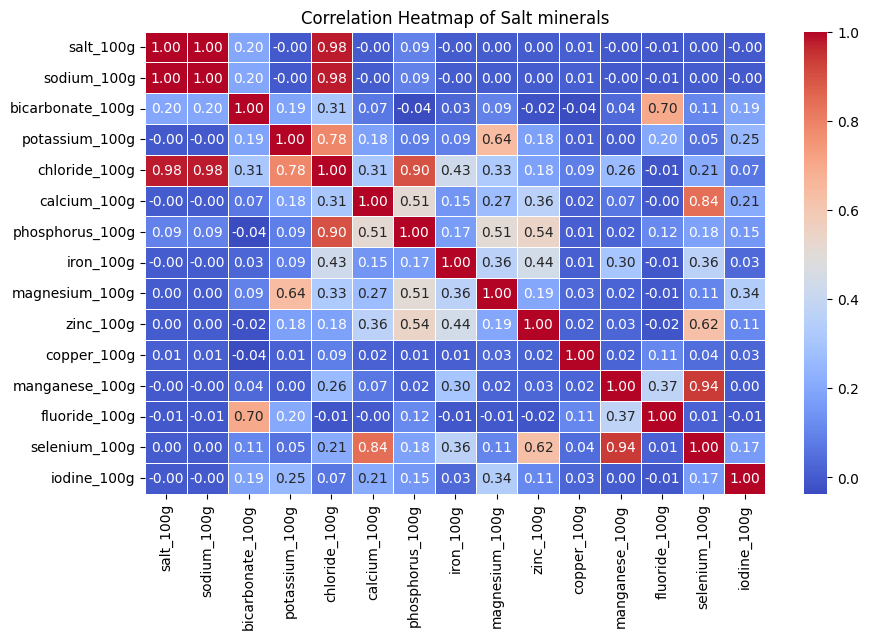

In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_selected = subset_df[salt_minerals]

# Compute correlation matrix
corr_matrix = df_selected.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Salt minerals")
plt.show()


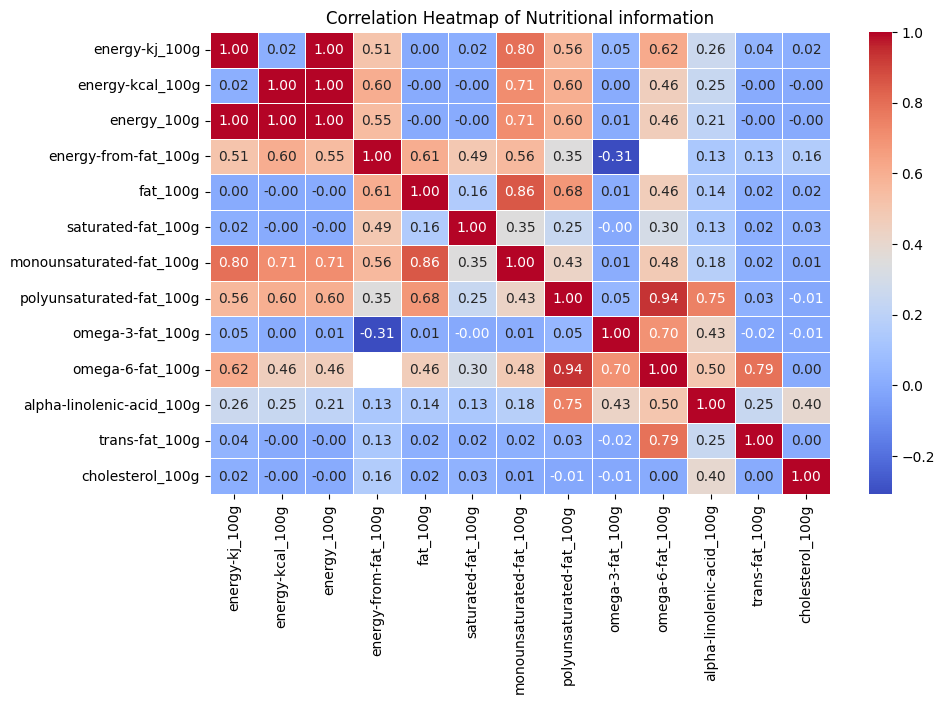

In [56]:

df_selected = subset_df[nutritional_info_100g]

# Compute correlation matrix
corr_matrix = df_selected.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Nutritional information")
plt.show()
